# Разработка модели

In [6]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [8]:
!pip install seaborn  # Use the exclamation mark to run shell commands in a notebook

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [10]:
import piplite
await piplite.install('seaborn')

ModuleNotFoundError: No module named 'piplite'

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('usedcars.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 1. Линейная регрессия и множественная линейная регрессия

#### Загрузим модули для линейной регрессии:

In [23]:
from sklearn.linear_model import LinearRegression

#### Создайте объект линейной регрессии:

In [26]:
lm = LinearRegression()
lm

LinearRegression()

#### Как «highway-mpg» может помочь нам предсказать цену автомобиля?

##### Используя простую линейную регрессию, мы создадим линейную функцию с "highway-mpg" в качестве предикторной переменной и "price" в качестве ответной переменной.

In [30]:
X = df[['highway-mpg']]
Y = df['price']

In [32]:
lm.fit(X,Y)

LinearRegression()

In [34]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

#### Каково значение отрезка (а)?

In [37]:
lm.intercept_

38423.3058581574

#### Каково значение наклона (b)?

In [40]:
lm.coef_

array([-821.73337832])

#### Price = 38423.31 - 821.73 x highway-mpg

In [46]:
Yhat=38423.30 - 821.73*X
Yhat

,highway-mpg
0,16236.59
1,16236.59
2,17058.32
3,13771.40
4,20345.24
...,...
196,15414.86
197,17880.05
198,19523.51
199,16236.59


## Множественная линейная регрессия

#### Давайте разработаем модель, используя эти переменные в качестве предикторных переменных.

In [50]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [52]:
lm.fit(Z, df['price'])

LinearRegression()

In [54]:
lm.intercept_

-15806.624626329212

In [56]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

#### Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

## 2. Оценка модели с использованием визуализации

In [61]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

#### График регрессии

##### Давайте представим шоссейную милю на галлон как потенциальную предикторную переменную цены:

(0.0, 48168.21342576659)

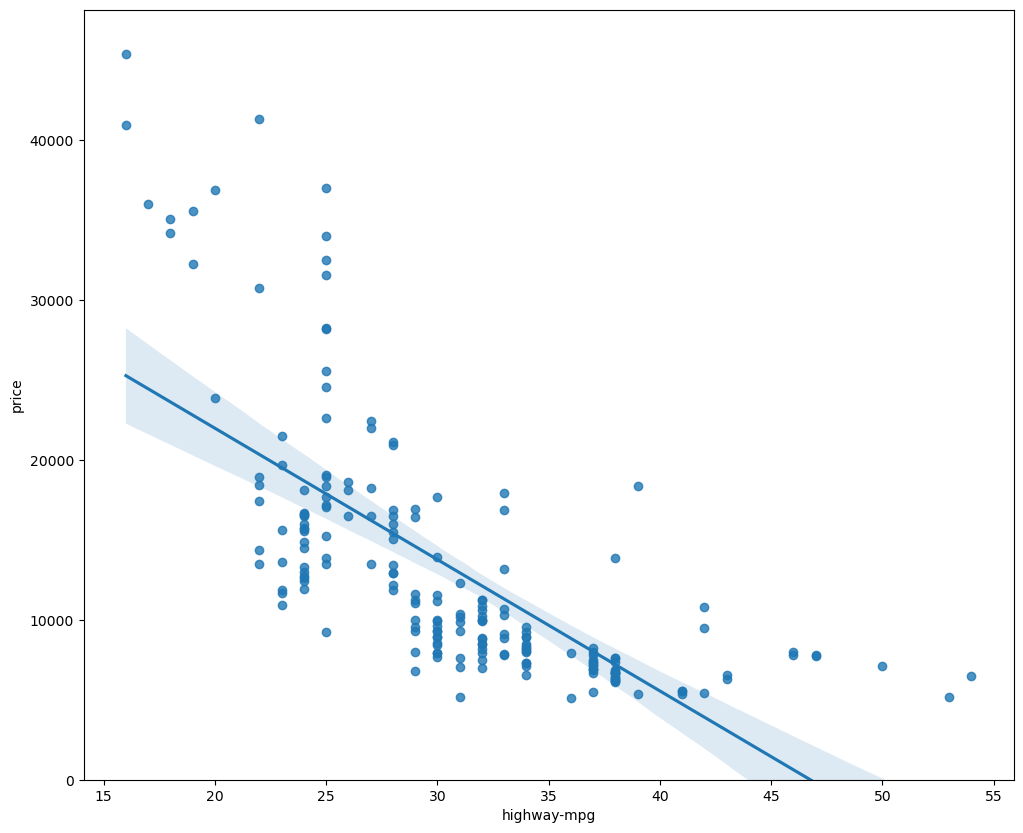

In [65]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

#### Давайте сравним этот график с графиком регрессии «пик-обороты».

(0.0, 47414.1)

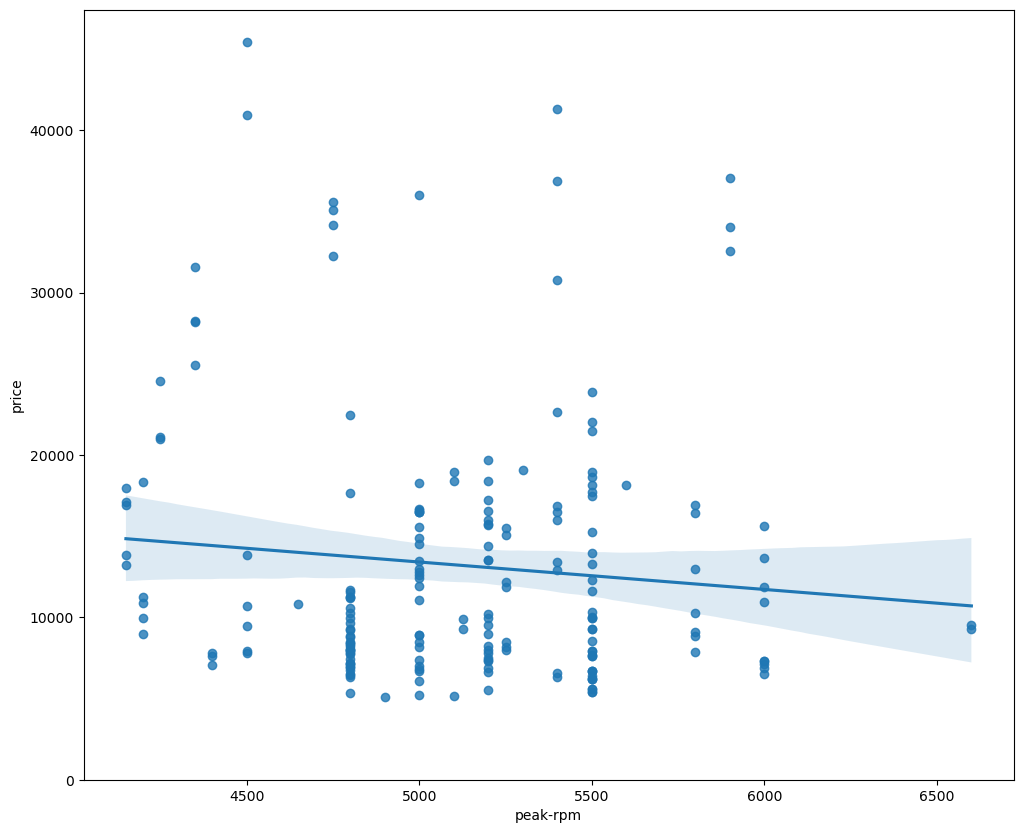

In [68]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

#### Если точки на графике остатков случайным образом разбросаны по оси x, то для данных подходит линейная модель.

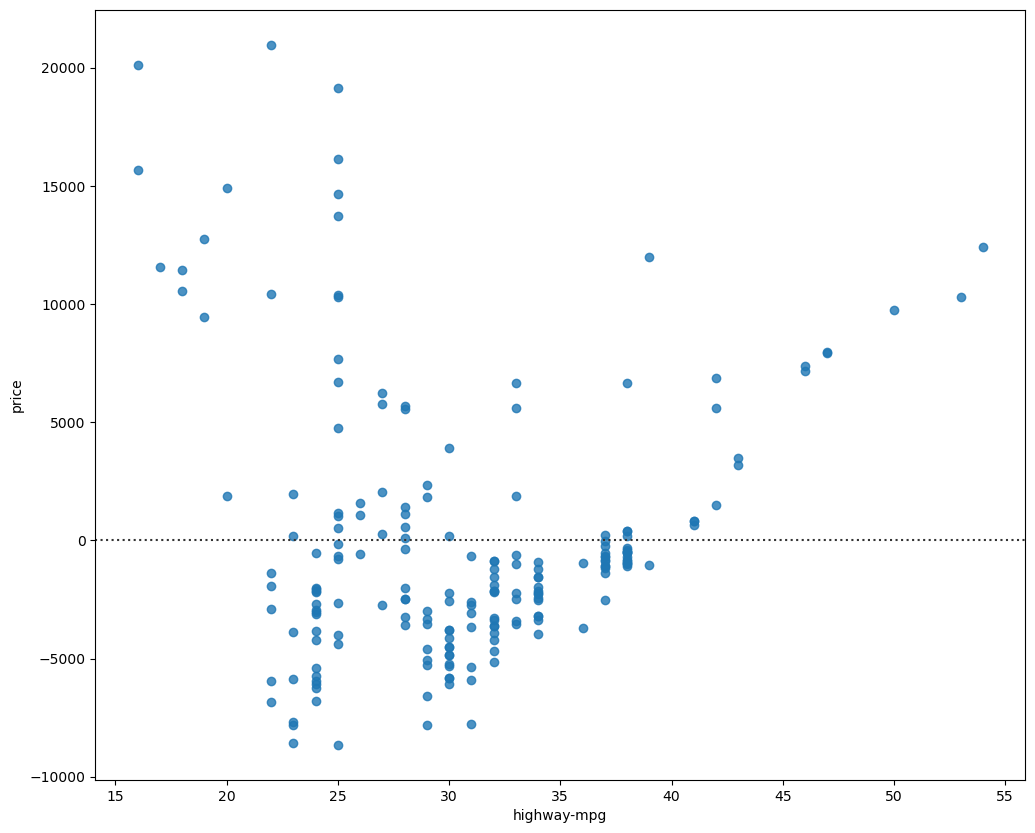

In [70]:
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

#### Из этого графика остатков видно, что остатки не распределены случайным образом по оси x, что наводит нас на мысль, что, возможно, для этих данных более подходит нелинейная модель.

## Множественная линейная регрессия

#### Сначала давайте сделаем прогноз:

In [76]:
Y_hat = lm.predict(Z)

/tmp/ipykernel_133/4196657742.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_133/4196657742.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function

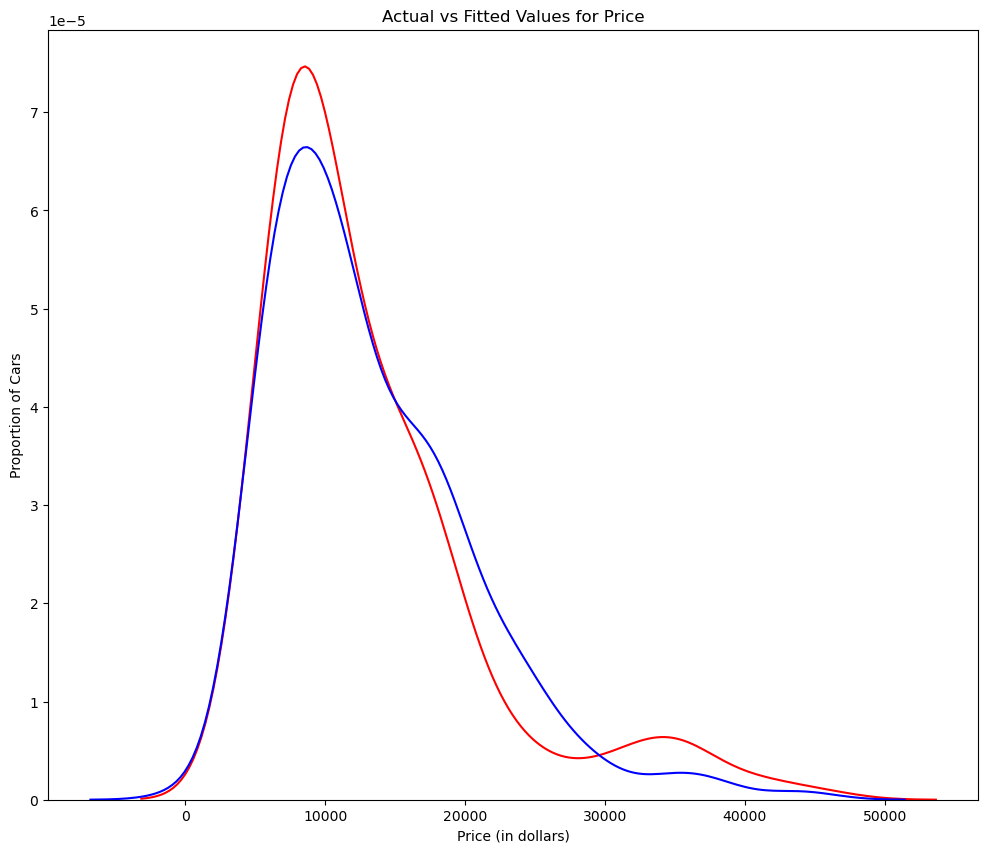

In [78]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

#### Мы видим, что подобранные значения достаточно близки к фактическим значениям, поскольку два распределения немного перекрываются. Однако, определенно есть некоторые возможности для улучшения.

## 3. Полиномиальная регрессия и конвейеры

#### Полиномиальная регрессия является частным случаем общей линейной регрессионной модели или моделей множественной линейной регрессии.

In [83]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

#### Давайте получим переменные:

In [86]:
x = df['highway-mpg']
y = df['price']

#### Давайте подгоним полином с помощью функции polyfit, а затем воспользуемся функцией poly1d для отображения полиномиальной функции.

In [89]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


#### Давайте построим график функции:

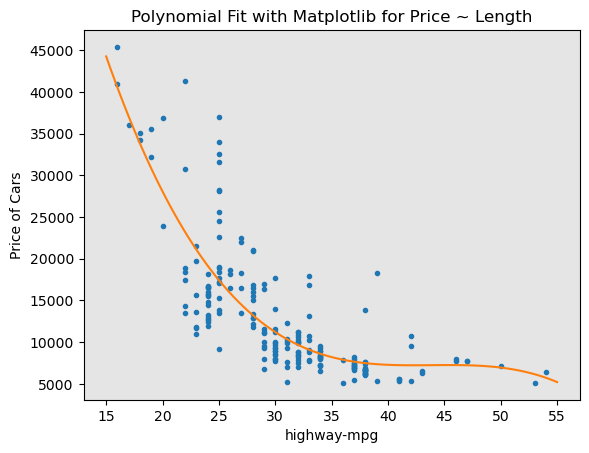

In [91]:
PlotPolly(p, x, y, 'highway-mpg')

In [94]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

##### Мы уже можем видеть из графика, что эта полиномиальная модель работает лучше, чем линейная модель. Это происходит потому, что сгенерированная полиномиальная функция «попадает» в большее количество точек данных.

#### Мы можем выполнить полиномиальное преобразование для нескольких признаков. Сначала мы импортируем модуль:

In [99]:
from sklearn.preprocessing import PolynomialFeatures

#### Мы создаем объект PolynomialFeatures степени 2:

In [102]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [104]:
Z_pr=pr.fit_transform(Z)

In [107]:
Z.shape

(201, 4)

##### В исходных данных содержится 201 образец и 4 признака.

In [111]:
Z_pr.shape

(201, 15)

#####  После преобразования осталось 201 образец и 15 признаков.

## Трубопровод

#### Data Pipelines упрощают этапы обработки данных. Мы используем модуль Pipeline для создания конвейера. Мы также используем StandardScaler как этап в нашем конвейере.

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#### Мы создаем конвейер, создавая список кортежей, включающий имя модели или оценщика и соответствующий ему конструктор.

In [118]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

#### Мы вводим список как аргумент конструктору конвейера:

In [121]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

#### Сначала мы преобразуем тип данных Z в тип float, чтобы избежать предупреждений о преобразовании, которые могут появиться в результате того, что StandardScaler принимает входные данные float.

In [125]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

#### Затем мы можем нормализовать данные, выполнить преобразование и одновременно подогнать модель.

In [127]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

## 4. Меры оценки внутри выборки

### Модель 1: Простая линейная регрессия

#### Давайте вычислим R^2:

In [132]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


#### Мы можем предсказать выход, т. е. "yhat", используя метод прогнозирования, где X — это входная переменная:

In [135]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


#### Импортируем функцию mean_squared_error из модуля metrics:

In [138]:
from sklearn.metrics import mean_squared_error

#### Мы можем сравнить прогнозируемые результаты с фактическими результатами:

In [141]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


### Модель 2: Множественная линейная регрессия

#### Давайте вычислим R^2:

In [145]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577458


#### Давайте рассчитаем MSE.

In [148]:
Y_predict_multifit = lm.predict(Z)

#### Сравниваем прогнозируемые результаты с фактическими:

In [151]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.870726489


### Модель 3: Полиномиальная подгонка

#### Давайте импортируем функцию r2_score из модуля metrics, так как мы используем другую функцию.

In [155]:
from sklearn.metrics import r2_score

#### Применим функцию, чтобы получить значение R^2:

In [158]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


#### Мы также можем рассчитать MSE:

In [161]:
mean_squared_error(df['price'], p(x))

20474146.42636121

## 5. Прогнозирование и принятие решений

#### В предыдущем разделе мы обучили модель с помощью метода fit. Теперь мы будем использовать метод predict для создания прогноза. Давайте импортируем pyplot для построения графика; мы также будем использовать некоторые функции из numpy.

In [167]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

#### Создайте новый вход:

In [170]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

#### Подойдет модель:

In [173]:
lm.fit(X, Y)
lm

LinearRegression()

#### Сделайте прогноз:

In [176]:
yhat=lm.predict(new_input)
yhat[0:5]

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

#### Мы можем построить график данных:

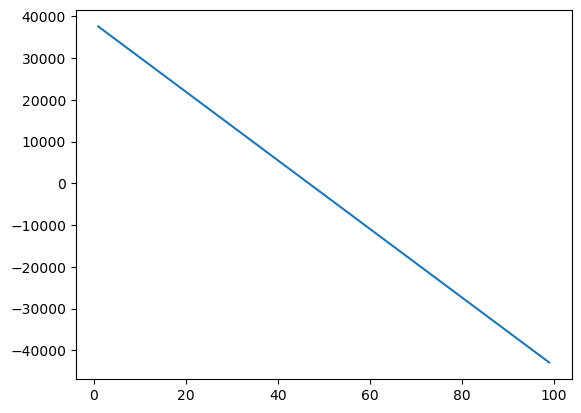

In [179]:
plt.plot(new_input, yhat)
plt.show()